# Introduction

Lopsided galaxies are a 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from astropy import constants as const
from astropy.utils.data import get_pkg_data_filename
from sklearn.inspection import PartialDependenceDisplay
import os
from astropy.io import fits
from statistics import mean
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import specificity_score
from sklearn.metrics import make_scorer
from matplotlib.ticker import AutoMinorLocator
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.patches as mpatches
import shap #shapley values
import warnings
import time
warnings.filterwarnings('ignore')
plt.rcParams['axes.linewidth'] = 4
sss=StratifiedShuffleSplit(n_splits=10,test_size= 0.3 ,random_state=42)
pd.set_option('display.max_columns', None)

In [50]:
#Por si acaso
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# 1. Opening files

In [3]:
file = '/home/tina/Documents/Tesis/RandomForest/git/labelsv10_21-08-24.csv'

In [4]:
df = pd.read_csv(f'{file}')

In [5]:
df.loc[df['A1_14r90'] >= 0.1, 'Flag_new'] = 0 #lopsided
df.loc[df['A1_14r90'] < 0.1, 'Flag_new'] = 1 #symmetric
df['1.4R90'] = 1.4 * df['R90']
df_90 = df.loc[df['R90']>=3]

In [6]:
df_90

,ID,ss,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,R90,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90
0,8,99,3.732403e+10,624045.0,0.467340,0.300947,0.621835,3.975659,1.808497e+10,1.200431e+10,2.720523e+08,2.847826,3.991059e+10,4.842103e+06,1.775310e+07,4.6,13.1,2.10,20.2,14.5,0.112672,0.116737,0.142822,8_99,0.0,18.34
1,10,99,6.118169e+10,1064902.0,0.473920,0.325405,0.636288,0.000000,2.948239e+10,2.004928e+10,2.522047e+08,2.901639,6.422963e+10,4.704806e+06,1.158285e+07,6.1,17.7,2.70,23.9,12.8,0.038950,0.040242,0.035058,10_99,1.0,24.78
2,11,99,3.748761e+10,643940.0,0.581535,0.344843,0.661394,1.058097,1.776158e+10,1.260010e+10,8.408220e+07,2.353659,5.205091e+10,3.030883e+06,7.240297e+06,8.2,19.3,3.65,25.8,14.6,0.084840,0.079839,0.049894,11_99,1.0,27.02
3,20,99,1.832122e+10,318432.0,0.423514,0.344874,0.476064,0.831690,8.899552e+09,6.124759e+09,1.961784e+08,2.842105,2.157858e+10,7.226621e+06,1.712977e+07,3.8,10.8,2.00,14.4,7.4,0.060876,0.079469,0.043072,20_99,1.0,15.12
4,28,99,8.146002e+09,141060.0,0.462574,0.571788,0.541310,0.052089,3.931759e+09,2.544547e+09,4.888741e+08,3.312500,7.527371e+09,1.270005e+07,5.056100e+07,1.6,5.3,1.60,8.4,5.3,0.043368,0.045225,0.040734,28_99,1.0,7.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,635886,67,1.564279e+09,25639.0,0.509567,0.467046,0.459883,0.495417,7.817133e+08,5.115191e+08,7.679848e+07,2.611111,3.296038e+09,9.209099e+06,3.174670e+07,1.8,4.7,1.15,7.1,5.9,0.097213,0.160725,0.132817,635886_67,0.0,6.58
7958,638111,67,1.550478e+09,25915.0,0.443484,0.580964,0.454205,0.222965,7.522789e+08,4.949074e+08,9.353821e+07,2.375000,2.668032e+09,1.175443e+07,4.862282e+07,1.6,3.8,1.35,6.1,4.3,0.081542,0.094340,0.081805,638111_67,1.0,5.32
7959,639246,67,1.196864e+09,19432.0,0.480462,0.586669,0.450049,0.313716,5.585959e+08,4.026588e+08,7.902515e+07,2.800000,2.144144e+09,5.082416e+06,2.894051e+07,1.5,4.2,1.30,7.5,5.4,0.085739,0.102696,0.103191,639246_67,0.0,5.88
7960,642305,67,1.377033e+09,22832.0,0.467536,0.491078,0.509454,0.194600,7.000087e+08,4.365831e+08,1.136835e+08,2.642857,2.149788e+09,8.597536e+06,4.244148e+07,1.4,3.7,1.00,6.3,4.2,0.075232,0.095762,0.079653,642305_67,1.0,5.18


In [7]:
len(df_90.loc[df_90['Flag_new']==1]) #symmetric

2646

In [8]:
len(df_90.loc[df_90['Flag_new']==0]) #lopsided

5273

In [9]:
feat = df_90[['IDs','DT', 'mustar', 'M50_tot', 'R50','CA', 'lambdaR', '1.4R90', 'SFR','A1_14r90','C','tidal_force_good']]

feat1 = df_90[['DT', 'mustar','M50_tot', 'R50', 'CA', 'lambdaR', '1.4R90', 'SFR','C','tidal_force_good']]

label = df_90['Flag_new']

## 1.1 Training and Testing set

Explicacion

In [13]:
csv_file = '/home/tina/Documents/Tesis/RandomForest/git/csv_files/21-08-24'

In [15]:
X_train_new= pd.read_csv(f'{csv_file}/X_train_new.csv')
X1_train_new= pd.read_csv(f'{csv_file}/X1_train_new.csv')
y_train_new= pd.read_csv(f'{csv_file}/y_train_new.csv')
X_test_new= pd.read_csv(f'{csv_file}/X_test_new.csv')
X1_test_new= pd.read_csv(f'{csv_file}/X1_test_new.csv')
y_test_new= pd.read_csv(f'{csv_file}/y_test_new.csv')
over_X1_train= pd.read_csv(f'{csv_file}/over_X1_train.csv')
over_y_train= pd.read_csv(f'{csv_file}/over_y_train.csv')

In [16]:
X_train = X_train_new.loc[X_train_new['R90']>=3]
X1_train = X1_train_new.loc[X1_train_new['R90']>=3]
X_test = X_test_new.loc[X_test_new['R90']>=3]
X1_test= X1_test_new.loc[X_test_new['R90']>=3]

In [17]:
X_train['1.4R90'] = 1.4 * X_train['R90']
X1_train['1.4R90'] = 1.4* X1_train['R90']
X_test['1.4R90'] = 1.4* X_test['R90']
X1_test['1.4R90'] = 1.4*X1_test['R90']

In [18]:
X_train.drop(labels=['R90'],axis=1,inplace=True)
X1_train.drop(labels=['R90'],axis=1,inplace=True)
X_test.drop(labels=['R90'],axis=1,inplace=True)
X1_test.drop(labels=['R90'],axis=1,inplace=True)

In [19]:
# "True" label

y_train = X_train['Flag_new']
y_test = X_test['Flag_new']

In [20]:
oversample = SMOTE(sampling_strategy='minority',random_state=42)
over_X1_train_new, over_y_train_new = oversample.fit_resample(X1_train, y_train)

## 1.2 How to separate into a training and testing set

# 2. Random Forest

### Hyperparameter tuning

In [21]:
# Number of trees in random forest
n_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 500, 1000, 1500]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree. The number of splits that each decision tree is allowed to make.
max_depth = [None, 3, 5, 7, 10, 20, 50, 75, 100, 150, 200]

# Minimum number of samples required to split an internal node
min_samples_split = [5, 10, 15, 20, 30, 0.1]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

In [22]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
rf_base= RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator= rf_base,
                               param_distributions = random_grid,
                               n_iter = 10,
                               scoring='accuracy',
                               cv = cv,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

In [23]:
%%time
rf_random.fit(over_X1_train_new, over_y_train_new.values.ravel())

Fitting 50 folds for each of 10 candidates, totalling 500 fits


[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=8; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=2, min

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10, 20, 50,
                                                      75, 100, 150, 200],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [5, 10, 15, 20, 30,
                                                              0.1],
                                        'n_estimators': [2, 4, 8, 16, 32, 64,
                                                         128, 256, 500, 1000,
                                                         1500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 1500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 75}

In [25]:
clf_sm = RandomForestClassifier(n_estimators= 1500,
 min_samples_split= 5,
 min_samples_leaf= 2,
 max_features = 'sqrt',
 max_depth= 75,
 random_state=42)

##

In [26]:
%%time
model_sm = clf_sm.fit(over_X1_train_new, over_y_train_new.values.ravel())

CPU times: user 27.1 s, sys: 133 ms, total: 27.2 s
Wall time: 27.2 s


In [27]:
%%time
preds = model_sm.predict(X1_test)

CPU times: user 602 ms, sys: 8 ms, total: 610 ms
Wall time: 609 ms


In [28]:
%%time
probs = model_sm.predict_proba(X1_test)

CPU times: user 496 ms, sys: 1.97 ms, total: 498 ms
Wall time: 498 ms


In [29]:
X_test_sm = X_test.copy()
X_test_sm['probs'] = probs[:,1]
X_test_sm['pred_0.5'] = preds
X_test_sm['true'] = y_test
X_test_sm.loc[X_test_sm['probs'] > 0.4, 'pred_0.4'] = 1.0 #symmetric
X_test_sm.loc[X_test_sm['probs'] <= 0.4, 'pred_0.4'] = 0.0 #lopsided
X_test_sm.loc[X_test_sm['probs'] > 0.6, 'pred_0.6'] = 1.0
X_test_sm.loc[X_test_sm['probs'] <= 0.6, 'pred_0.6'] = 0.0

In [168]:
X_test_sm.to_csv('results/21-08-24/X_test_sm_21-08-24.csv',index=False)

In [31]:
X_test_sm = pd.read_csv('/home/tina/Documents/Tesis/RandomForest/git/results/21-08-24/X_test_sm_21-08-24.csv')

In [33]:
X_test_sm

,ID,ss,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90,probs,pred_0.5,true,pred_0.4,pred_0.6
0,8,99,3.732403e+10,624045.0,0.467340,0.300947,0.621835,3.975659,1.808497e+10,1.200431e+10,2.720523e+08,2.847826,3.991059e+10,4.842103e+06,1.775310e+07,4.6,2.10,20.2,14.5,0.112672,0.116737,0.142822,8_99,0.0,18.34,0.713917,1.0,0.0,1.0,1.0
1,20,99,1.832122e+10,318432.0,0.423514,0.344874,0.476064,0.831690,8.899552e+09,6.124759e+09,1.961784e+08,2.842105,2.157858e+10,7.226621e+06,1.712977e+07,3.8,2.00,14.4,7.4,0.060876,0.079469,0.043072,20_99,1.0,15.12,0.846550,1.0,1.0,1.0,1.0
2,60,99,3.820214e+09,66795.0,0.476919,0.471985,0.612361,0.000000,1.814801e+09,1.275252e+09,6.868835e+07,2.551724,6.588564e+09,9.668136e+06,1.625907e+07,2.9,1.95,8.8,4.3,0.066322,0.072252,0.038727,60_99,1.0,10.36,0.669664,1.0,1.0,1.0,1.0
3,96786,99,6.089087e+09,104719.0,0.556888,0.418165,0.667896,0.174084,2.991325e+09,1.940351e+09,1.214500e+08,3.392857,9.133518e+09,7.052752e+06,1.065289e+07,2.8,1.80,10.9,5.0,0.095329,0.102644,0.100995,96786_99,0.0,13.30,0.608672,1.0,0.0,1.0,1.0
4,117252,99,1.930686e+11,3327835.0,0.487027,0.403446,0.517594,0.022551,8.623664e+10,6.114089e+10,6.301647e+08,2.757576,1.573324e+11,6.319310e+06,2.609781e+07,6.6,3.85,29.2,19.3,0.022868,0.027446,0.023023,117252_99,1.0,25.48,0.947329,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,625772,67,1.999083e+09,32882.0,0.440425,0.453542,0.472183,0.376646,9.582349e+08,6.757344e+08,4.184028e+07,2.518519,5.334815e+09,7.079380e+06,1.696652e+07,2.7,1.70,9.1,6.2,0.135534,0.170042,0.073810,625772_67,0.0,9.52,0.099293,0.0,0.0,0.0,0.0
2373,626636,67,2.352969e+09,38983.0,0.432100,0.510972,0.418812,0.467680,1.183082e+09,7.209098e+08,1.921361e+08,2.500000,2.832275e+09,1.612766e+07,6.605888e+07,1.4,1.10,5.6,4.3,0.086280,0.099444,0.096065,626636_67,1.0,4.90,0.835516,1.0,1.0,1.0,1.0
2374,630606,67,1.521270e+09,24916.0,0.436160,0.522774,0.402895,0.266136,7.428939e+08,4.976389e+08,1.399233e+08,2.846154,2.103430e+09,8.412138e+06,4.152626e+07,1.3,1.00,6.3,5.1,0.116755,0.137364,0.158294,630606_67,0.0,5.18,0.606624,1.0,0.0,1.0,1.0
2375,639246,67,1.196864e+09,19432.0,0.480462,0.586669,0.450049,0.313716,5.585959e+08,4.026588e+08,7.902515e+07,2.800000,2.144144e+09,5.082416e+06,2.894051e+07,1.5,1.30,7.5,5.4,0.085739,0.102696,0.103191,639246_67,0.0,5.88,0.217119,0.0,0.0,0.0,0.0


# 3. Results

## Scores

In [36]:
precision_lst = []
recall_lst = []
f1_lst = []
bal_acc = []
acc = []
auc_lst = []
gmean_lst = []
tnr_lst = []


pipeline = make_pipeline(SMOTE(sampling_strategy = 'minority'), model_sm) #SMOTE + RF pipeline
sf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
#using for loop to conduct SMOTE in each fold of cross-validation
for train, test in sf.split(feat1,label):
    model = pipeline.fit(feat1.iloc[train],label.iloc[train])
    prediction = model.predict(feat1.iloc[test])
    precision_lst.append(precision_score(label.iloc[test], prediction))
    recall_lst.append(recall_score(label.iloc[test], prediction))
    f1_lst.append(f1_score(label.iloc[test], prediction))
    bal_acc.append(balanced_accuracy_score(label.iloc[test], prediction))
    acc.append(accuracy_score(label.iloc[test], prediction))
    auc_lst.append(roc_auc_score(label.iloc[test], prediction))
    gmean_lst.append(geometric_mean_score(label.iloc[test], prediction))
    tnr_lst.append(specificity_score(label.iloc[test], prediction))

In [37]:
print("Mean Precision: {:.3f} and std: {:.3f}".format(np.mean(precision_lst),np.std(precision_lst)))
print("Mean Recall: {:.3f} and std: {:.3f}".format(np.mean(recall_lst),np.std(recall_lst)))
print("Mean F1: {:.3f} and std: {:.3f}".format(np.mean(f1_lst),np.std(f1_lst)))
print("Mean Balanced-Acc: {:.3f} and std: {:.3f}".format(np.mean(bal_acc),np.std(bal_acc)))
print("Mean Accuracy: {:.3f} and std: {:.3f}".format(np.mean(acc),np.std(acc)))
print("Mean AUC: {:.3f} and std: {:.3f}".format(np.mean(auc_lst),np.std(auc_lst)))
print("Mean G-mean: {:.3f} and std: {:.3f}".format(np.mean(gmean_lst),np.std(gmean_lst)))
print("Mean TNR: {:.3f} and std: {:.3f}".format(np.mean(tnr_lst),np.std(tnr_lst)))

Mean Precision: 0.702 and std: 0.013
Mean Recall: 0.797 and std: 0.019
Mean F1: 0.747 and std: 0.012
Mean Balanced-Acc: 0.814 and std: 0.010
Mean Accuracy: 0.819 and std: 0.009
Mean AUC: 0.814 and std: 0.010
Mean G-mean: 0.813 and std: 0.010
Mean TNR: 0.830 and std: 0.010


## Confusion Matrix

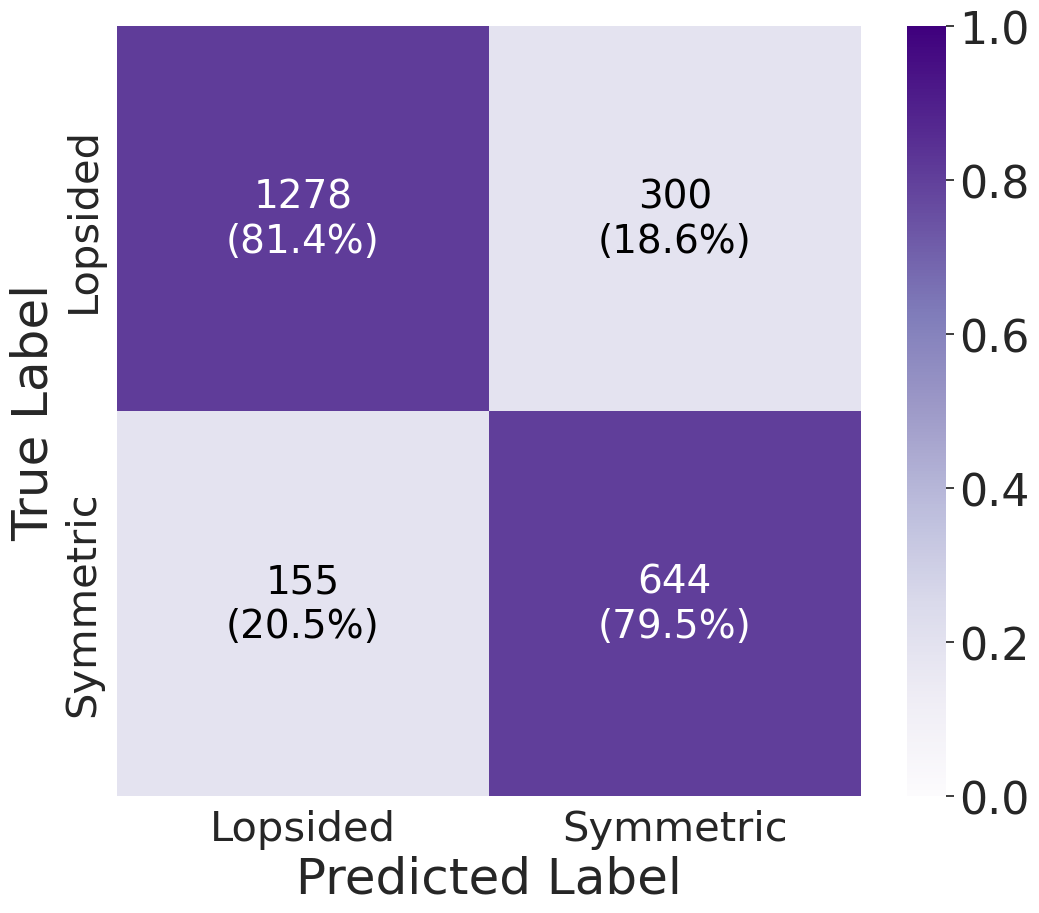

In [35]:
actual = X_test_sm['true']
predicted = X_test_sm['pred_0.5']

# Create confusion matrix
cm = confusion_matrix(actual, predicted)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels for the matrix
#labels = ['TN', 'FP',  'FN','TP']
percentage = ['(81.4%)','(18.6%)','(20.5%)','(79.5%)']

# Plot confusion matrix with annotations
plt.figure(figsize=(12, 10))
sns.set(font_scale=2.9) 
h1= sns.heatmap(cmn, annot=False, fmt='', cmap='Purples', xticklabels=[ 'Lopsided','Symmetric'], yticklabels=['Lopsided','Symmetric'], cbar=True,  vmin=0, vmax=1)

# Add text for TP, TN, FP, FN in each box
thresh = cm.max() / 2.
for i in range(2):
   for j in range(2):
       plt.text(j + 0.5, i + 0.5, f'{cm[i][j]}\n{percentage[i*2+j]}', ha='center', va='center', color="white" if cm[i, j] > thresh else "black",  fontsize=28)



h1.set_xticklabels(h1.get_xticklabels(), fontsize=30)
h1.set_yticklabels(h1.get_yticklabels(), fontsize=30)


plt.xlabel('Predicted Label', fontsize=36)
plt.ylabel('True Label', fontsize=36)

#plt.title(r'BRF CM Test set',fontsize=20)

#plt.savefig('plots/sm_cm_41-08-24_test.png',bbox_inches = 'tight', pad_inches=0.1)
plt.show() 

## Interpretacion

#### Feature Importance

In [42]:
result1_sm = permutation_importance(
    clf_sm, X1_test, y_test.values.ravel(), scoring='balanced_accuracy', n_repeats=5, random_state=42
)

In [43]:
d={'mean':list(result1_sm.importances_mean), 'std':list(result1_sm.importances_std)}
df_mean = pd.DataFrame(d, index = X1_test.columns).sort_values(by='mean',ascending=False)

In [44]:
df_mean

,mean,std
mustar,0.242930,0.010621
tidal_force_good,0.072285,0.003824
SFR,0.047444,0.005302
DT,0.009005,0.002047
lambdaR,0.006586,0.002012
M50_tot,0.006234,0.000864
CA,0.004205,0.000934
C,0.003042,0.003434
R50,0.001760,0.002815
1.4R90,0.000721,0.000990


In [45]:
sorted_importances_idx = result1_sm.importances_mean.argsort()
importances1_sm = pd.DataFrame(
    result1_sm.importances[sorted_importances_idx].T,
    columns=X1_test.columns[sorted_importances_idx],
)

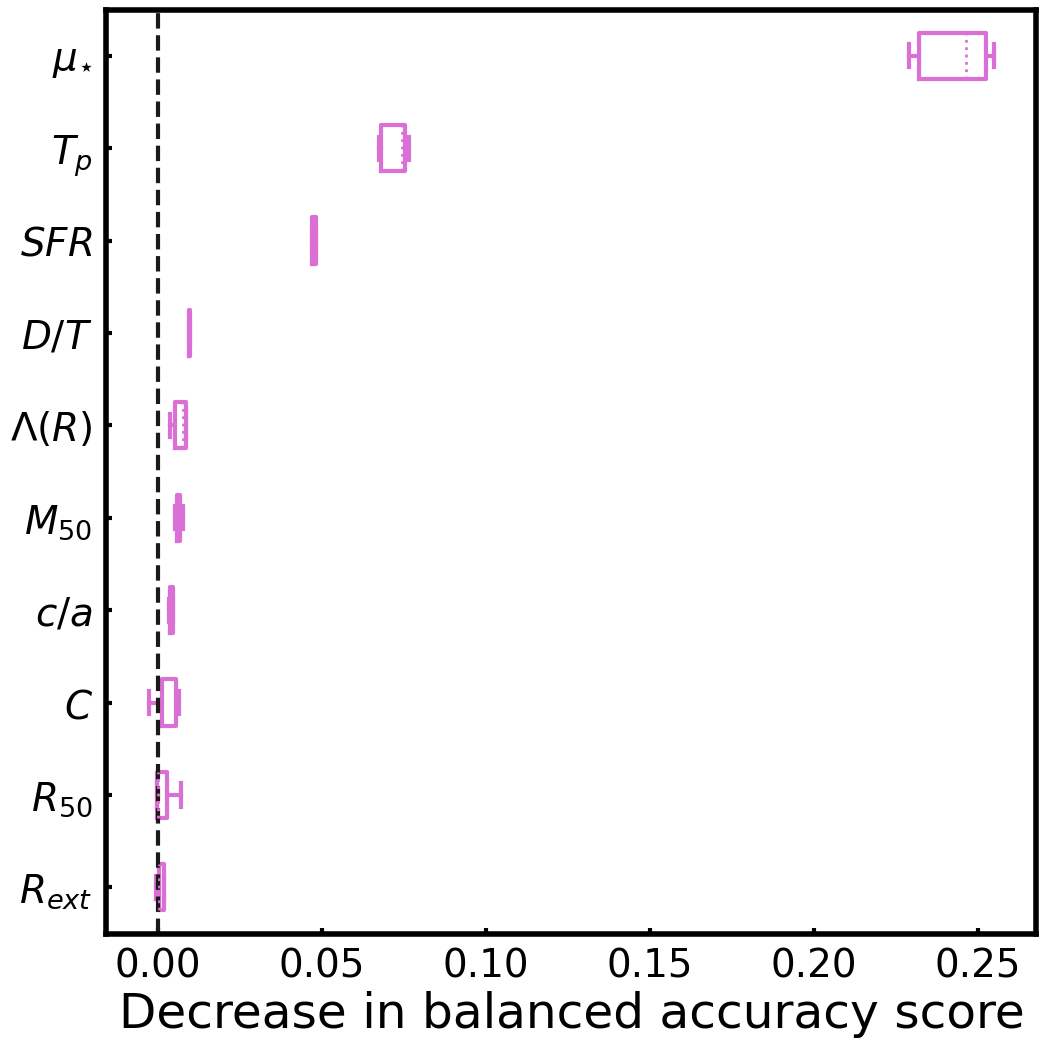

In [52]:
fig, ax = plt.subplots(figsize=(12,12))

ax.tick_params(axis='both', which='major', direction='in', length=4, width=3, color='black', pad=10, labelsize=28, labelcolor='black')
#plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.linewidth'] = 4
#plt.rcParams['savefig.dpi'] = 100

#labels=importances.columns
labels=[r'$R_{ext}$',r'$R_{50}$',r'$C$',r'$c/a$',r'$M_{50}$',r'$\Lambda(R)$',r'$D/T$',r'$SFR$',r'$T_p$',r'$\mu_{\star}$']

box = ax.boxplot(importances1_sm,vert=False,labels=labels,showfliers=False)


# Setting the line width of the boxplot
for line in box['boxes']:
    line.set_linewidth(3)  # Adjust the line width as needed
    line.set_color('orchid')


# Setting the line width of the boxplot
for whisker in box['whiskers']:
    whisker.set_linewidth(3)  # Adjust the line width as needed
    whisker.set_color('orchid')

# Setting the line width of the boxplot
for cap in box['caps']:
    cap.set_linewidth(3)  # Adjust the line width as needed
    cap.set_color('orchid')

# Setting the line width of the boxplot
for median in box['medians']:
    median.set_linewidth(2)  # Adjust the line width as needed
    median.set_color('orchid')
    median.set_linestyle('dotted')
# Setting the line width of the boxplot
for flier in box['fliers']:
    flier.set_linewidth(20)  # Adjust the line width as needed
    flier.set_color('orchid')
    flier.set_markersize(10)
#ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--",linewidth=3)
ax.set_xlabel("Decrease in balanced accuracy score",fontsize=35)
#ax.set_title('SMOTE+RF', fontsize=35)

#plt.savefig('plots/boxplot1_testsm_21-08-24.jpg',bbox_inches = 'tight', pad_inches=0.1)

plt.show()

#### ROC curve 

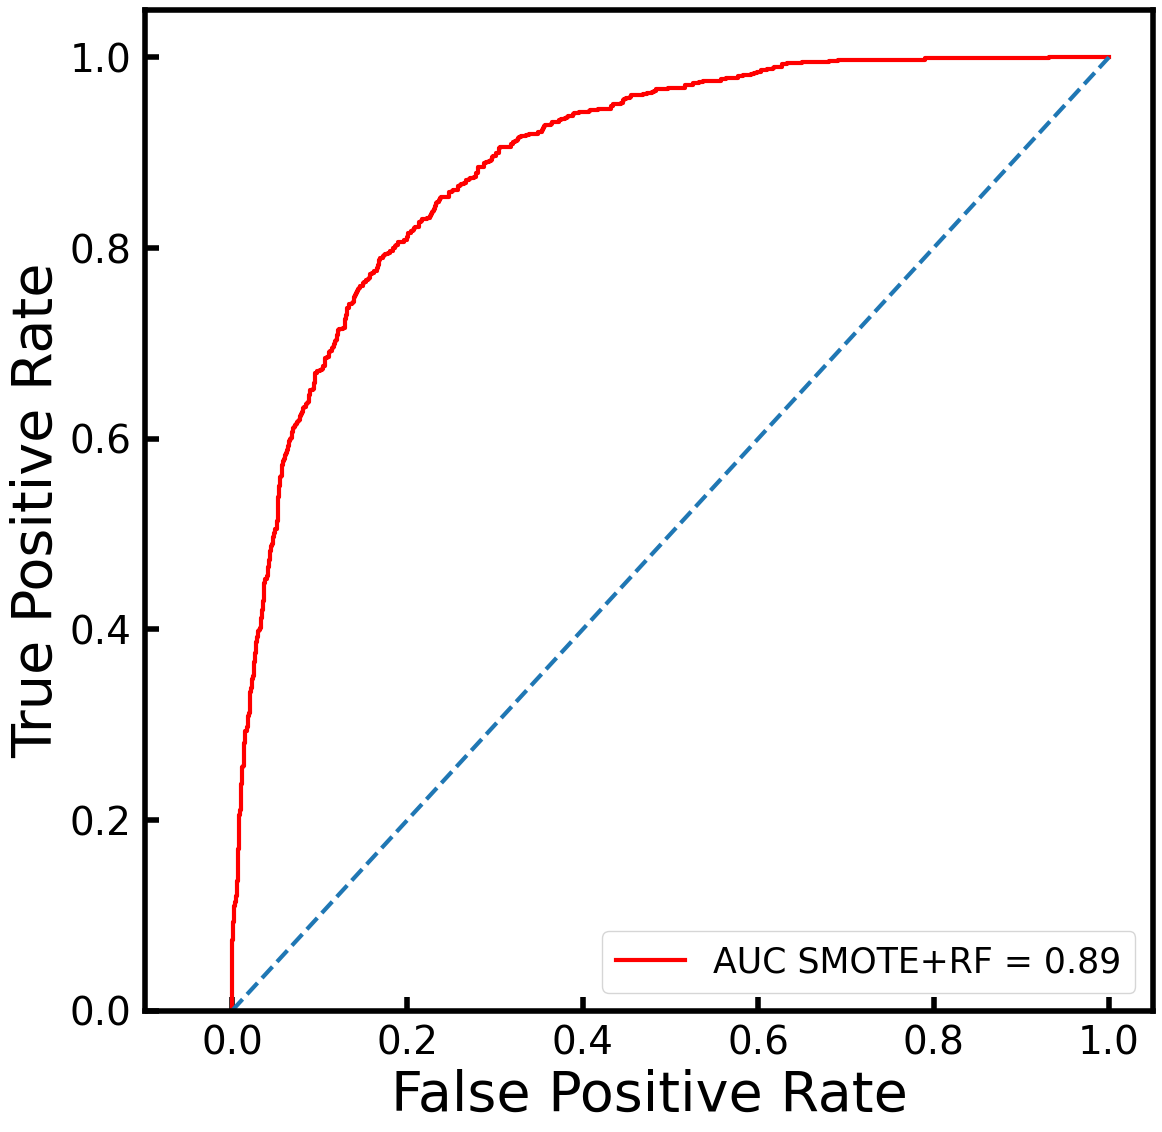

In [53]:
fig, axs = plt.subplots(1, 1, figsize=(13, 13))

#ax.minorticks_on()
axs.tick_params(axis='both', which='major', direction='in', length=10, width=4, color='black', pad=10, labelsize=28, labelcolor='black')

fpr2, tpr2, threshold2 = metrics.roc_curve(X_test_sm['true'], X_test_sm['probs'])
auc = metrics.roc_auc_score(X_test_sm['true'], X_test_sm['probs'])

plt.plot(fpr2, tpr2,color='red', label = 'AUC SMOTE+RF = %0.2f' % auc,linewidth=3)


plt.legend(loc = 'lower right',fontsize=25)
plt.plot([0, 1], [0, 1],'--' ,linewidth=3)
plt.xlim([-0.099, 1.05])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate',fontsize=40)
plt.xlabel('False Positive Rate',fontsize=40)

#plt.savefig('plots/roc_curve_sm.jpeg')

plt.show()

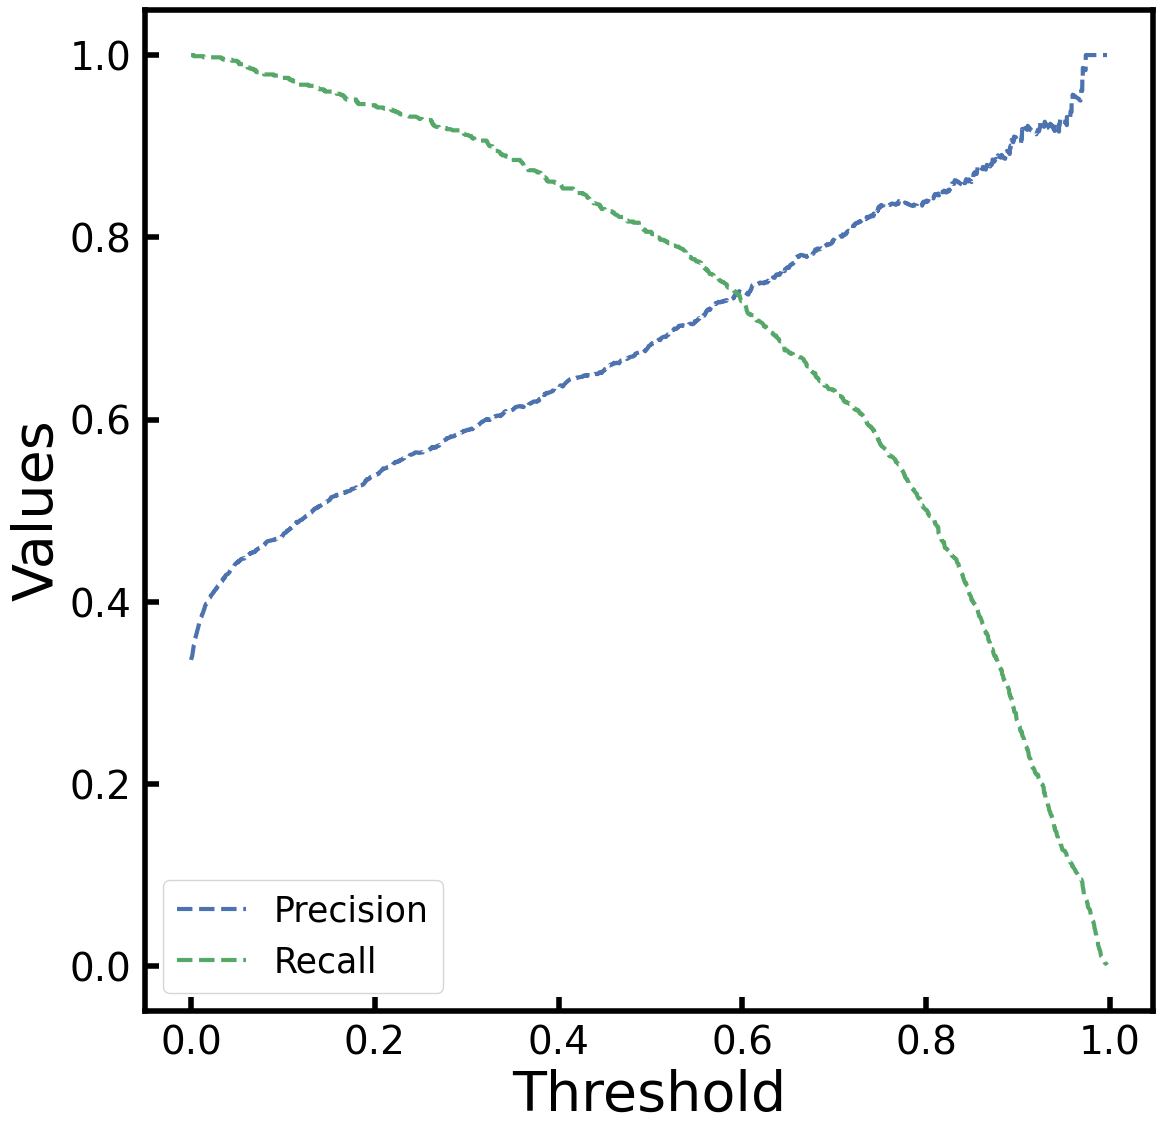

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(13, 13))

#ax.minorticks_on()
axs.tick_params(axis='both', which='major', direction='in', length=10, width=4, color='black', pad=10, labelsize=28, labelcolor='black')

precision, recall, thresholds = precision_recall_curve(X_test_sm['true'], X_test_sm['probs'])
plt.plot(thresholds, precision[:-1], "b--", label="Precision",linewidth=3)
plt.plot(thresholds, recall[:-1], "g--", label="Recall",linewidth=3)
plt.xlabel("Threshold",fontsize=40)
plt.ylabel("Values",fontsize=40)

plt.legend(fontsize=25)

#plt.savefig('plots/precision_recall_sm.jpeg')

plt.show()

TypeError: 'numpy.float64' object is not callable

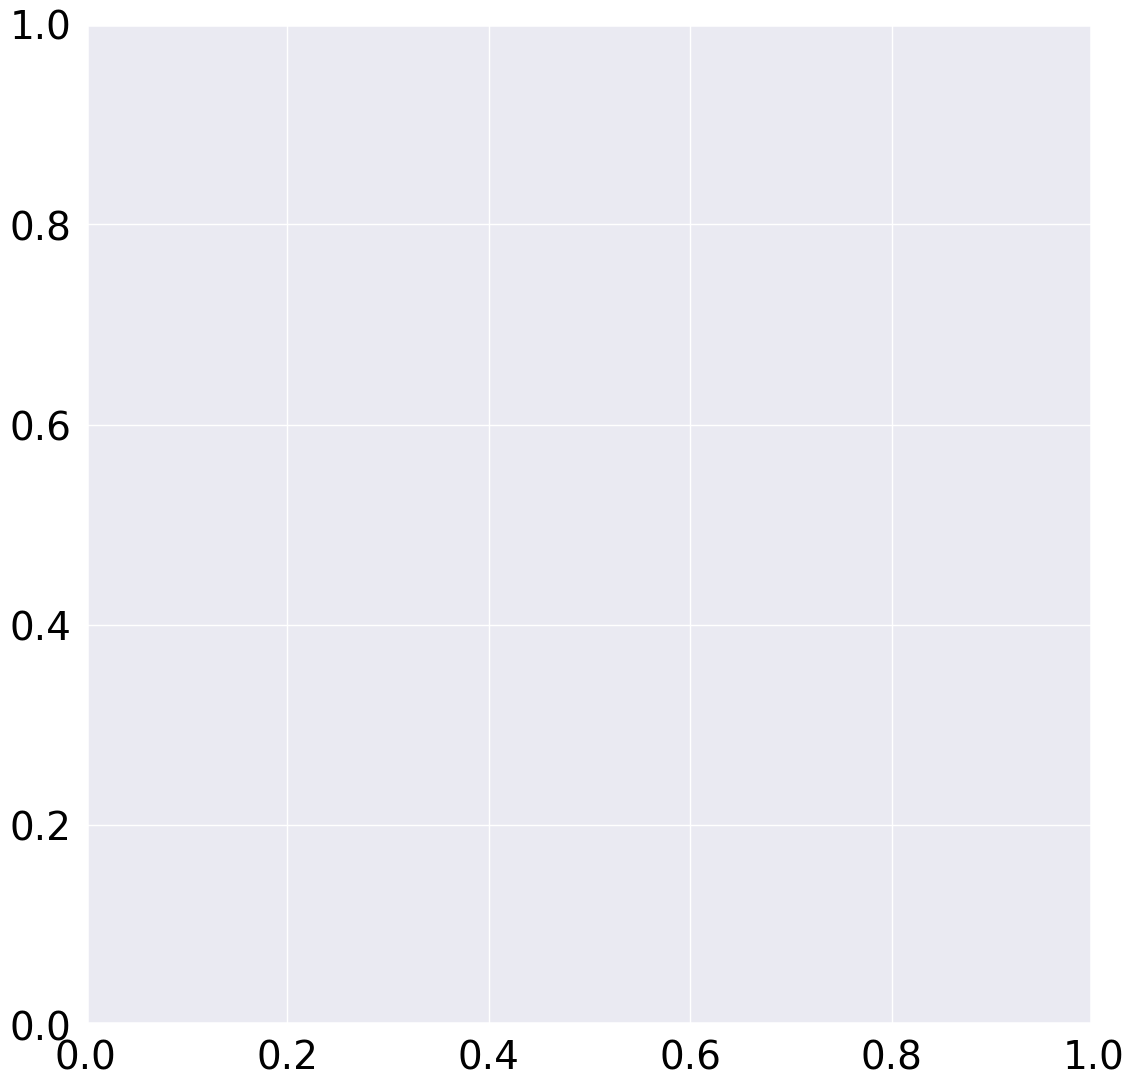

In [49]:
fig, axs = plt.subplots(1, 1, figsize=(13, 13))

#ax.minorticks_on()
axs.tick_params(axis='both', which='major', direction='in', length=10, width=4, color='black', pad=10, labelsize=28, labelcolor='black')

precision, recall, thresholds = precision_recall_curve(X_test_sm['true'], X_test_sm['probs'])
area = auc(recall, precision)

normalized_thresholds = (thresholds - thresholds.min()) / (thresholds.max() - thresholds.min())

scatter = plt.scatter(recall[:-1], precision[:-1], c=normalized_thresholds, cmap='GnBu', s=10, alpha=1)
cbar=plt.colorbar(scatter, label='Threshold')

ticks = np.linspace(0, 1, 11)  # 11 ticks from 0 to 1
cbar.set_ticks(ticks)

plt.ylabel("Precision",fontsize=40)
plt.xlabel("Recall",fontsize=40)
#plt.title("Precision-Recall curve")
plt.legend([f'AUC = {area:.2f}'], loc='lower left',fontsize=25)

plt.show()

# 4. Using non-correlated parameters

In [55]:
X2_train_mean = X1_train.drop(labels=['mustar','tidal_force_good','lambdaR','DT','C'],axis=1)
X2_test_mean = X1_test.drop(labels=['mustar','tidal_force_good','lambdaR','DT','C'],axis=1)
over_X2_train = over_X1_train_new.drop(labels=['mustar','tidal_force_good','lambdaR','DT','C'],axis=1)
feat2_mean = feat1.drop(labels=['mustar','tidal_force_good','lambdaR','DT','C'],axis=1)

In [56]:
over_X2_train

,CA,M50_tot,R50,SFR,1.4R90
0,0.325405,6.422963e+10,6.100000,0.000000,24.780000
1,0.344843,5.205091e+10,8.200000,1.058097,27.020000
2,0.571788,7.527371e+09,1.600000,0.052089,7.420000
3,0.603808,6.410722e+09,1.900000,0.000000,9.940000
4,0.334223,5.952292e+10,7.000000,1.411389,26.040000
...,...,...,...,...,...
7385,0.277447,2.859574e+10,6.491549,2.491329,18.859846
7386,0.365208,1.199589e+10,2.000000,1.201698,8.400000
7387,0.334874,2.560286e+10,3.163128,1.709947,12.687728
7388,0.434050,3.874862e+10,3.560628,5.508260,14.842931


# Adding L50 

In [76]:
lum = pd.read_csv('galaxy_sample_luminosity.txt', sep=' ', skiprows=[0], header=None)

In [77]:
lum.columns = ['ID','ss','L50', 'stellar-M-L']

In [78]:
lum['ID'] = lum['ID'].astype(int).astype(str)
lum['ss'] = lum['ss'].astype(int).astype(str)

In [79]:
lum['IDs'] = lum['ID']+'_'+lum['ss']

In [80]:
lum

,ID,ss,L50,stellar-M-L,IDs
0,8,99,1.778464e+10,1.049331,8_99
1,10,99,1.244996e+10,2.457098,10_99
2,11,99,1.533587e+10,1.222218,11_99
3,20,99,5.988825e+09,1.529616,20_99
4,28,99,2.263931e+09,1.799067,28_99
...,...,...,...,...,...
7957,635886,67,8.970757e+08,0.871809,635886_67
7958,638111,67,7.616578e+08,1.017800,638111_67
7959,639246,67,8.056265e+08,0.742779,639246_67
7960,642305,67,6.309567e+08,1.091201,642305_67


In [81]:
df_90_L = df_90.merge(lum,on='IDs',how='inner')

In [82]:
df_90_L

,ID_x,ss_x,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,R90,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90,ID_y,ss_y,L50,stellar-M-L
0,8,99,3.732403e+10,624045.0,0.467340,0.300947,0.621835,3.975659,1.808497e+10,1.200431e+10,2.720523e+08,2.847826,3.991059e+10,4.842103e+06,1.775310e+07,4.6,13.1,2.10,20.2,14.5,0.112672,0.116737,0.142822,8_99,0.0,18.34,8,99,1.778464e+10,1.049331
1,10,99,6.118169e+10,1064902.0,0.473920,0.325405,0.636288,0.000000,2.948239e+10,2.004928e+10,2.522047e+08,2.901639,6.422963e+10,4.704806e+06,1.158285e+07,6.1,17.7,2.70,23.9,12.8,0.038950,0.040242,0.035058,10_99,1.0,24.78,10,99,1.244996e+10,2.457098
2,11,99,3.748761e+10,643940.0,0.581535,0.344843,0.661394,1.058097,1.776158e+10,1.260010e+10,8.408220e+07,2.353659,5.205091e+10,3.030883e+06,7.240297e+06,8.2,19.3,3.65,25.8,14.6,0.084840,0.079839,0.049894,11_99,1.0,27.02,11,99,1.533587e+10,1.222218
3,20,99,1.832122e+10,318432.0,0.423514,0.344874,0.476064,0.831690,8.899552e+09,6.124759e+09,1.961784e+08,2.842105,2.157858e+10,7.226621e+06,1.712977e+07,3.8,10.8,2.00,14.4,7.4,0.060876,0.079469,0.043072,20_99,1.0,15.12,20,99,5.988825e+09,1.529616
4,28,99,8.146002e+09,141060.0,0.462574,0.571788,0.541310,0.052089,3.931759e+09,2.544547e+09,4.888741e+08,3.312500,7.527371e+09,1.270005e+07,5.056100e+07,1.6,5.3,1.60,8.4,5.3,0.043368,0.045225,0.040734,28_99,1.0,7.42,28,99,2.263931e+09,1.799067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,635886,67,1.564279e+09,25639.0,0.509567,0.467046,0.459883,0.495417,7.817133e+08,5.115191e+08,7.679848e+07,2.611111,3.296038e+09,9.209099e+06,3.174670e+07,1.8,4.7,1.15,7.1,5.9,0.097213,0.160725,0.132817,635886_67,0.0,6.58,635886,67,8.970757e+08,0.871809
7915,638111,67,1.550478e+09,25915.0,0.443484,0.580964,0.454205,0.222965,7.522789e+08,4.949074e+08,9.353821e+07,2.375000,2.668032e+09,1.175443e+07,4.862282e+07,1.6,3.8,1.35,6.1,4.3,0.081542,0.094340,0.081805,638111_67,1.0,5.32,638111,67,7.616578e+08,1.017800
7916,639246,67,1.196864e+09,19432.0,0.480462,0.586669,0.450049,0.313716,5.585959e+08,4.026588e+08,7.902515e+07,2.800000,2.144144e+09,5.082416e+06,2.894051e+07,1.5,4.2,1.30,7.5,5.4,0.085739,0.102696,0.103191,639246_67,0.0,5.88,639246,67,8.056265e+08,0.742779
7917,642305,67,1.377033e+09,22832.0,0.467536,0.491078,0.509454,0.194600,7.000087e+08,4.365831e+08,1.136835e+08,2.642857,2.149788e+09,8.597536e+06,4.244148e+07,1.4,3.7,1.00,6.3,4.2,0.075232,0.095762,0.079653,642305_67,1.0,5.18,642305,67,6.309567e+08,1.091201


In [83]:
feat_L = df_90_L[['IDs','CA','M50_tot','L50','R90','SFR','A1_14r90']]
feat1_L = df_90_L[['CA', 'M50_tot','L50', 'R90', 'SFR']]
label = df_90_L['Flag_new']

In [84]:
X_test

,ID,ss,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90
0,8,99,3.732403e+10,624045.0,0.467340,0.300947,0.621835,3.975659,1.808497e+10,1.200431e+10,2.720523e+08,2.847826,3.991059e+10,4.842103e+06,1.775310e+07,4.6,2.10,20.2,14.5,0.112672,0.116737,0.142822,8_99,0.0,18.34
1,20,99,1.832122e+10,318432.0,0.423514,0.344874,0.476064,0.831690,8.899552e+09,6.124759e+09,1.961784e+08,2.842105,2.157858e+10,7.226621e+06,1.712977e+07,3.8,2.00,14.4,7.4,0.060876,0.079469,0.043072,20_99,1.0,15.12
2,60,99,3.820214e+09,66795.0,0.476919,0.471985,0.612361,0.000000,1.814801e+09,1.275252e+09,6.868835e+07,2.551724,6.588564e+09,9.668136e+06,1.625907e+07,2.9,1.95,8.8,4.3,0.066322,0.072252,0.038727,60_99,1.0,10.36
3,96786,99,6.089087e+09,104719.0,0.556888,0.418165,0.667896,0.174084,2.991325e+09,1.940351e+09,1.214500e+08,3.392857,9.133518e+09,7.052752e+06,1.065289e+07,2.8,1.80,10.9,5.0,0.095329,0.102644,0.100995,96786_99,0.0,13.30
4,117252,99,1.930686e+11,3327835.0,0.487027,0.403446,0.517594,0.022551,8.623664e+10,6.114089e+10,6.301647e+08,2.757576,1.573324e+11,6.319310e+06,2.609781e+07,6.6,3.85,29.2,19.3,0.022868,0.027446,0.023023,117252_99,1.0,25.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,625772,67,1.999083e+09,32882.0,0.440425,0.453542,0.472183,0.376646,9.582349e+08,6.757344e+08,4.184028e+07,2.518519,5.334815e+09,7.079380e+06,1.696652e+07,2.7,1.70,9.1,6.2,0.135534,0.170042,0.073810,625772_67,0.0,9.52
2385,626636,67,2.352969e+09,38983.0,0.432100,0.510972,0.418812,0.467680,1.183082e+09,7.209098e+08,1.921361e+08,2.500000,2.832275e+09,1.612766e+07,6.605888e+07,1.4,1.10,5.6,4.3,0.086280,0.099444,0.096065,626636_67,1.0,4.90
2386,630606,67,1.521270e+09,24916.0,0.436160,0.522774,0.402895,0.266136,7.428939e+08,4.976389e+08,1.399233e+08,2.846154,2.103430e+09,8.412138e+06,4.152626e+07,1.3,1.00,6.3,5.1,0.116755,0.137364,0.158294,630606_67,0.0,5.18
2387,639246,67,1.196864e+09,19432.0,0.480462,0.586669,0.450049,0.313716,5.585959e+08,4.026588e+08,7.902515e+07,2.800000,2.144144e+09,5.082416e+06,2.894051e+07,1.5,1.30,7.5,5.4,0.085739,0.102696,0.103191,639246_67,0.0,5.88


In [85]:
X_test_new = X_test.merge(lum,on='IDs',how='inner')
X_test_new.drop(columns=['ID_y','ss_y'],axis=1,inplace=True)

In [86]:
X_test_new

,ID_x,ss_x,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90,L50,stellar-M-L
0,8,99,3.732403e+10,624045.0,0.467340,0.300947,0.621835,3.975659,1.808497e+10,1.200431e+10,2.720523e+08,2.847826,3.991059e+10,4.842103e+06,1.775310e+07,4.6,2.10,20.2,14.5,0.112672,0.116737,0.142822,8_99,0.0,18.34,1.778464e+10,1.049331
1,20,99,1.832122e+10,318432.0,0.423514,0.344874,0.476064,0.831690,8.899552e+09,6.124759e+09,1.961784e+08,2.842105,2.157858e+10,7.226621e+06,1.712977e+07,3.8,2.00,14.4,7.4,0.060876,0.079469,0.043072,20_99,1.0,15.12,5.988825e+09,1.529616
2,60,99,3.820214e+09,66795.0,0.476919,0.471985,0.612361,0.000000,1.814801e+09,1.275252e+09,6.868835e+07,2.551724,6.588564e+09,9.668136e+06,1.625907e+07,2.9,1.95,8.8,4.3,0.066322,0.072252,0.038727,60_99,1.0,10.36,8.256619e+08,2.313365
3,96786,99,6.089087e+09,104719.0,0.556888,0.418165,0.667896,0.174084,2.991325e+09,1.940351e+09,1.214500e+08,3.392857,9.133518e+09,7.052752e+06,1.065289e+07,2.8,1.80,10.9,5.0,0.095329,0.102644,0.100995,96786_99,0.0,13.30,2.011252e+09,1.513724
4,117252,99,1.930686e+11,3327835.0,0.487027,0.403446,0.517594,0.022551,8.623664e+10,6.114089e+10,6.301647e+08,2.757576,1.573324e+11,6.319310e+06,2.609781e+07,6.6,3.85,29.2,19.3,0.022868,0.027446,0.023023,117252_99,1.0,25.48,3.751701e+10,2.573081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,625772,67,1.999083e+09,32882.0,0.440425,0.453542,0.472183,0.376646,9.582349e+08,6.757344e+08,4.184028e+07,2.518519,5.334815e+09,7.079380e+06,1.696652e+07,2.7,1.70,9.1,6.2,0.135534,0.170042,0.073810,625772_67,0.0,9.52,1.143571e+09,0.874042
2373,626636,67,2.352969e+09,38983.0,0.432100,0.510972,0.418812,0.467680,1.183082e+09,7.209098e+08,1.921361e+08,2.500000,2.832275e+09,1.612766e+07,6.605888e+07,1.4,1.10,5.6,4.3,0.086280,0.099444,0.096065,626636_67,1.0,4.90,1.582151e+09,0.743581
2374,630606,67,1.521270e+09,24916.0,0.436160,0.522774,0.402895,0.266136,7.428939e+08,4.976389e+08,1.399233e+08,2.846154,2.103430e+09,8.412138e+06,4.152626e+07,1.3,1.00,6.3,5.1,0.116755,0.137364,0.158294,630606_67,0.0,5.18,8.645788e+08,0.879735
2375,639246,67,1.196864e+09,19432.0,0.480462,0.586669,0.450049,0.313716,5.585959e+08,4.026588e+08,7.902515e+07,2.800000,2.144144e+09,5.082416e+06,2.894051e+07,1.5,1.30,7.5,5.4,0.085739,0.102696,0.103191,639246_67,0.0,5.88,8.056265e+08,0.742779


In [87]:
X_train_new = X_train.merge(lum,on='IDs',how='inner')
X_train_new.drop(columns=['ID_y','ss_y'],axis=1,inplace=True)

In [88]:
X_train_new

,ID_x,ss_x,Mstar,Nstar,DT,CA,lambdaR,SFR,Mbulge,Mdisk,mustar,C,M50_tot,tidal_force,tidal_force_good,R50,h90,R265,R25,a1_12r90,A1_14r90,A1_r25,IDs,Flag_new,1.4R90,L50,stellar-M-L
0,10,99,6.118169e+10,1064902.0,0.473920,0.325405,0.636288,0.000000,2.948239e+10,2.004928e+10,2.522047e+08,2.901639,6.422963e+10,4.704806e+06,1.158285e+07,6.1,2.70,23.9,12.8,0.038950,0.040242,0.035058,10_99,1.0,24.78,1.244996e+10,2.457098
1,11,99,3.748761e+10,643940.0,0.581535,0.344843,0.661394,1.058097,1.776158e+10,1.260010e+10,8.408220e+07,2.353659,5.205091e+10,3.030883e+06,7.240297e+06,8.2,3.65,25.8,14.6,0.084840,0.079839,0.049894,11_99,1.0,27.02,1.533587e+10,1.222218
2,28,99,8.146002e+09,141060.0,0.462574,0.571788,0.541310,0.052089,3.931759e+09,2.544547e+09,4.888741e+08,3.312500,7.527371e+09,1.270005e+07,5.056100e+07,1.6,1.60,8.4,5.3,0.043368,0.045225,0.040734,28_99,1.0,7.42,2.263931e+09,1.799067
3,49,99,4.762917e+09,85000.0,0.400120,0.603808,0.524897,0.000000,2.192145e+09,1.503069e+09,1.932913e+08,3.736842,6.410722e+09,1.647928e+07,1.791150e+07,1.9,2.20,7.3,3.5,0.059560,0.068141,0.035772,49_99,1.0,9.94,8.778517e+08,2.712814
4,63869,99,4.710370e+10,804477.0,0.572272,0.334223,0.551617,1.411389,2.258004e+10,1.545167e+10,1.466827e+08,2.657143,5.952292e+10,3.309637e+06,9.250078e+06,7.0,3.10,26.2,20.6,0.076494,0.097368,0.100792,63869_99,1.0,26.04,9.384556e+09,2.509638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537,634571,67,1.373965e+09,23333.0,0.424127,0.599662,0.315658,0.162112,6.507949e+08,4.511593e+08,6.393656e+07,3.444444,3.141172e+09,8.776404e+06,1.318004e+07,1.8,1.95,7.1,3.5,0.095923,0.115691,0.082723,634571_67,0.0,8.68,9.364268e+08,0.733616
5538,635198,67,1.262300e+09,20848.0,0.407984,0.537294,0.366268,0.266880,6.046478e+08,4.042824e+08,3.638287e+07,2.478261,3.588832e+09,1.046307e+07,1.937888e+07,2.3,2.00,7.0,4.8,0.123887,0.148617,0.111008,635198_67,0.0,7.98,9.222154e+08,0.684327
5539,635886,67,1.564279e+09,25639.0,0.509567,0.467046,0.459883,0.495417,7.817133e+08,5.115191e+08,7.679848e+07,2.611111,3.296038e+09,9.209099e+06,3.174670e+07,1.8,1.15,7.1,5.9,0.097213,0.160725,0.132817,635886_67,0.0,6.58,8.970757e+08,0.871809
5540,638111,67,1.550478e+09,25915.0,0.443484,0.580964,0.454205,0.222965,7.522789e+08,4.949074e+08,9.353821e+07,2.375000,2.668032e+09,1.175443e+07,4.862282e+07,1.6,1.35,6.1,4.3,0.081542,0.094340,0.081805,638111_67,1.0,5.32,7.616578e+08,1.017800


In [89]:
X3_train_L = X_train_new[['CA', 'SFR','1.4R90','R50','L50']]
y_train = X_train_new['Flag_new']

In [90]:
X3_test_L = X_test_new[['CA', 'SFR','1.4R90','R50','L50']]
y_test = X_test_new['Flag_new']

In [91]:
oversample = SMOTE(sampling_strategy='minority',random_state=42)
over_X3_train_L, over_y_train_L = oversample.fit_resample(X3_train_L, y_train)

In [92]:
%%time
model3_sm = clf_sm.fit(over_X3_train_L, over_y_train_L.values.ravel())

CPU times: user 19.7 s, sys: 25 ms, total: 19.7 s
Wall time: 19.8 s


In [93]:
%time
preds3_sm = model3_sm.predict(X3_test_L)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


In [95]:
%time
probs3_sm = model3_sm.predict_proba(X3_test_L)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [96]:
X_test_L = X_test_new.copy()
X_test_L['probs'] = probs3_sm[:,1]
X_test_L['pred_0.5'] = preds3_sm
X_test_L['true'] = y_test
X_test_L.loc[X_test_L['probs'] > 0.4, 'pred_0.4'] = 1.0 #symmetric
X_test_L.loc[X_test_L['probs'] <= 0.4, 'pred_0.4'] = 0.0 #lopsided
X_test_L.loc[X_test_L['probs'] > 0.6, 'pred_0.6'] = 1.0
X_test_L.loc[X_test_L['probs'] <= 0.6, 'pred_0.6'] = 0.0

In [97]:
(X_test_L['Flag_new']==X_test_L['true']).unique()

array([ True])

#### FI

In [98]:
result_L = permutation_importance(
    model3_sm, X3_test_L, y_test.values.ravel(), scoring='balanced_accuracy', n_repeats=5, random_state=42
)

In [99]:
d={'mean':list(result_L.importances_mean), 'std':list(result_L.importances_std)}
df_mean = pd.DataFrame(d, index = X3_test_L.columns).sort_values(by='mean',ascending=False)

In [100]:
df_mean

,mean,std
L50,0.231948,0.004653
R50,0.118153,0.004767
SFR,0.072714,0.006729
1.4R90,0.020926,0.001700
CA,0.004786,0.002653


In [101]:
sorted_importances_idx = result_L.importances_mean.argsort()
importances1_sm = pd.DataFrame(
    result_L.importances[sorted_importances_idx].T,
    columns=X3_test_L.columns[sorted_importances_idx],
)

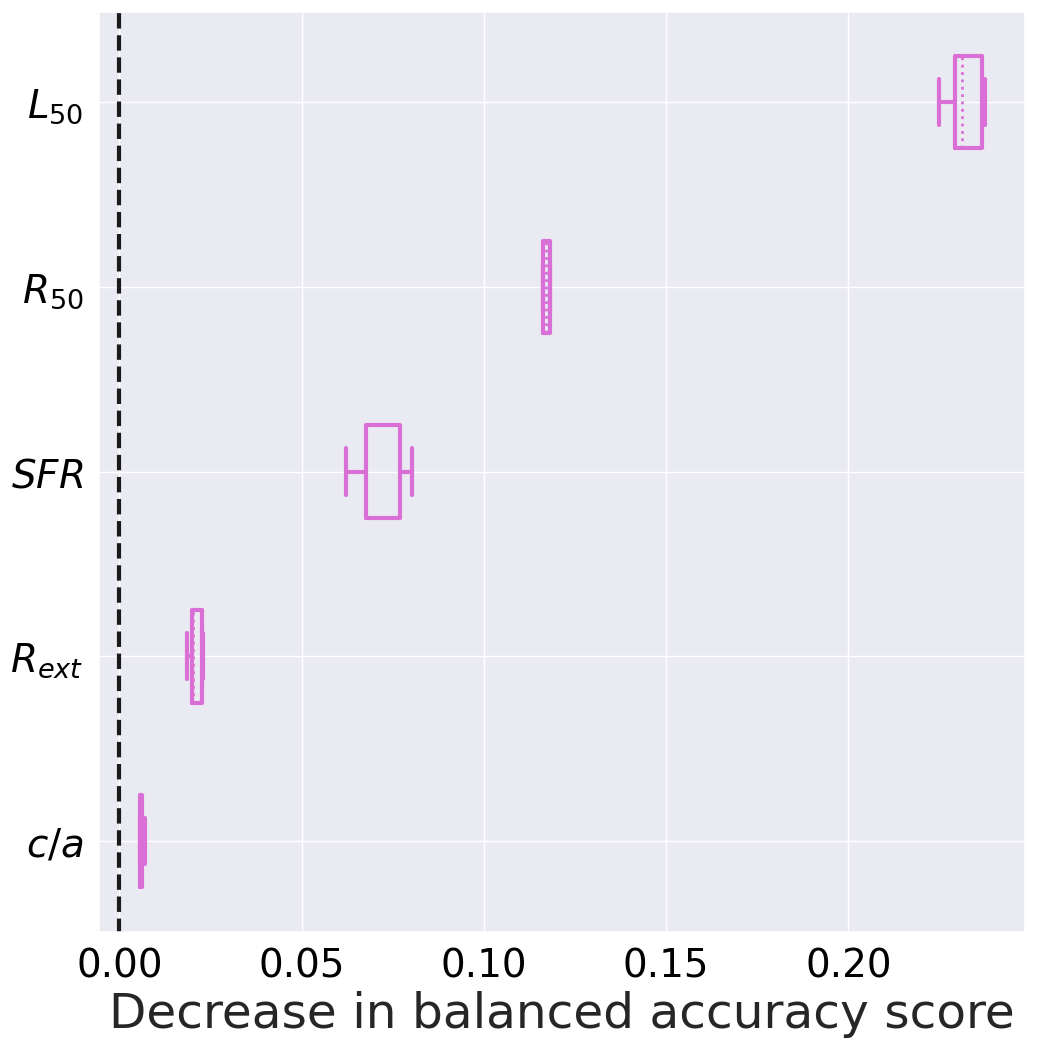

In [102]:
fig, ax = plt.subplots(figsize=(12,12))

ax.tick_params(axis='both', which='major', direction='in', length=4, width=3, color='black', pad=10, labelsize=28, labelcolor='black')
#plt.rcParams['figure.dpi'] = 400
plt.rcParams['axes.linewidth'] = 4
#plt.rcParams['savefig.dpi'] = 100

#labels=importances.columns
labels=[r'$c/a$',r'$R_{ext}$',r'$SFR$',r'$R_{50}$',r'$L_{50}$']

box = ax.boxplot(importances1_sm,vert=False,labels=labels,showfliers=False)


# Setting the line width of the boxplot
for line in box['boxes']:
    line.set_linewidth(3)  # Adjust the line width as needed
    line.set_color('orchid')


# Setting the line width of the boxplot
for whisker in box['whiskers']:
    whisker.set_linewidth(3)  # Adjust the line width as needed
    whisker.set_color('orchid')

# Setting the line width of the boxplot
for cap in box['caps']:
    cap.set_linewidth(3)  # Adjust the line width as needed
    cap.set_color('orchid')

# Setting the line width of the boxplot
for median in box['medians']:
    median.set_linewidth(2)  # Adjust the line width as needed
    median.set_color('orchid')
    median.set_linestyle('dotted')
# Setting the line width of the boxplot
for flier in box['fliers']:
    flier.set_linewidth(20)  # Adjust the line width as needed
    flier.set_color('orchid')
    flier.set_markersize(10)
#ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--",linewidth=3)
ax.set_xlabel("Decrease in balanced accuracy score",fontsize=35)

#plt.savefig('plots/boxplot2_testsm_21-08-24_L.png',bbox_inches = 'tight', pad_inches=0.1)

plt.show()

#### CM

In [103]:
X_test_L['true'].isna().unique()

array([False])

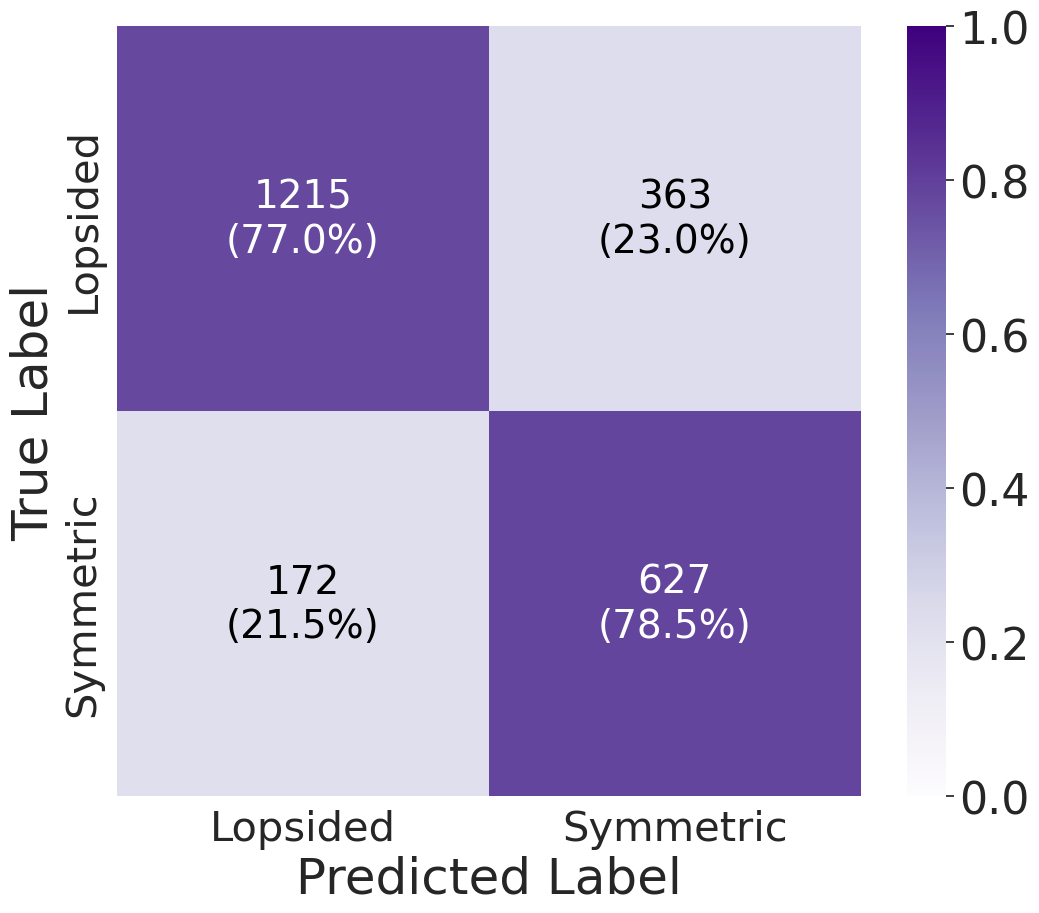

In [104]:
actual = X_test_L['true']
predicted = X_test_L['pred_0.5']

# Create confusion matrix
cm = confusion_matrix(actual, predicted)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels for the matrix
#labels = ['TN', 'FP',  'FN','TP']
percentage = ['(77.0%)','(23.0%)','(21.5%)','(78.5%)']

# Plot confusion matrix with annotations
plt.figure(figsize=(12, 10))
sns.set(font_scale=2.9) 
h1= sns.heatmap(cmn, annot=False, fmt='', cmap='Purples', xticklabels=[ 'Lopsided','Symmetric'], yticklabels=['Lopsided','Symmetric'], cbar=True, vmin=0, vmax=1)

# Add text for TP, TN, FP, FN in each box
thresh = cm.max() / 2.
for i in range(2):
   for j in range(2):
       plt.text(j + 0.5, i + 0.5, f'{cm[i][j]}\n{percentage[i*2+j]}', ha='center', va='center', color="white" if cm[i, j] > thresh else "black",  fontsize=28)



h1.set_xticklabels(h1.get_xticklabels(), fontsize=30)
h1.set_yticklabels(h1.get_yticklabels(), fontsize=30)


plt.xlabel('Predicted Label', fontsize=36)
plt.ylabel('True Label', fontsize=36)

#plt.title(r'BRF CM Test set',fontsize=20)

#plt.savefig('plots/sm_cm_41-08-24_L_test.png',bbox_inches = 'tight', pad_inches=0.1)
plt.show() 

#### Scores

In [105]:
precision_lst = []
recall_lst = []
f1_lst = []
bal_acc = []
acc = []
auc_lst = []
gmean_lst = []
tnr_lst = []


pipeline = make_pipeline(SMOTE(sampling_strategy = 'minority'), model3_sm) #SMOTE + RF pipeline
sf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
#using for loop to conduct SMOTE in each fold of cross-validation
for train, test in sf.split(feat1_L,label):
    model = pipeline.fit(feat1_L.iloc[train],label.iloc[train])
    prediction = model.predict(feat1_L.iloc[test])
    precision_lst.append(precision_score(label.iloc[test], prediction))
    recall_lst.append(recall_score(label.iloc[test], prediction))
    f1_lst.append(f1_score(label.iloc[test], prediction))
    bal_acc.append(balanced_accuracy_score(label.iloc[test], prediction))
    acc.append(accuracy_score(label.iloc[test], prediction))
    auc_lst.append(roc_auc_score(label.iloc[test], prediction))
    gmean_lst.append(geometric_mean_score(label.iloc[test], prediction))
    tnr_lst.append(specificity_score(label.iloc[test], prediction))

In [106]:
print("Mean Precision: {:.3f} and std: {:.3f}".format(np.mean(precision_lst),np.std(precision_lst)))
print("Mean Recall: {:.3f} and std: {:.3f}".format(np.mean(recall_lst),np.std(recall_lst)))
print("Mean F1: {:.3f} and std: {:.3f}".format(np.mean(f1_lst),np.std(f1_lst)))
print("Mean Balanced-Acc: {:.3f} and std: {:.3f}".format(np.mean(bal_acc),np.std(bal_acc)))
print("Mean Accuracy: {:.3f} and std: {:.3f}".format(np.mean(acc),np.std(acc)))
print("Mean AUC: {:.3f} and std: {:.3f}".format(np.mean(auc_lst),np.std(auc_lst)))
print("Mean G-mean: {:.3f} and std: {:.3f}".format(np.mean(gmean_lst),np.std(gmean_lst)))
print("Mean TNR: {:.3f} and std: {:.3f}".format(np.mean(tnr_lst),np.std(tnr_lst)))

Mean Precision: 0.690 and std: 0.012
Mean Recall: 0.770 and std: 0.017
Mean F1: 0.728 and std: 0.011
Mean Balanced-Acc: 0.798 and std: 0.009
Mean Accuracy: 0.807 and std: 0.008
Mean AUC: 0.798 and std: 0.009
Mean G-mean: 0.798 and std: 0.009
Mean TNR: 0.826 and std: 0.010
